<a href="https://colab.research.google.com/github/rachit-shah/automated-learning-and-data-analysis/blob/master/HW3Q4%20(NeuralNetwork).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. (16 points) (extra 5 points) [ANN] [Ruth Okoilu]
### Train, validate, and test a neural network model using the dataset in hw3q4.zip, which contains training data (75%), validation data (12.5%), and test data (12.5%). There are two output classes in this data set. You can either choose matlab or a python neural networks package, Keras for this problem. (All the output should be included in your report. Otherwise, your points are deducted.)


### (a) (5 extra points only for choosing Keras) Please briefly describe how to construct your working environments (e.g. language, package version, backend for neural networks, installation, etc.) in your report, and write how to execute your codes on ’readme’ file.

This code was written on google Colaboratory platform. Colaboratory is a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use.

This code uses python's deep learning library, Keras. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

Python version used is 3.6 and Keras version used is 2.2.4. tensorflow version is 1.12.0.(tensorflow backend is used for keras).

This is a Jupyter notebook. We can run cells and the output are shown below. In order to run a model again, Please reset/restart the runtime.

### (b) (8 points)
### (1) Construct neural networks using the given training dataset (X train, Y train) using different number of hidden neurons. Set the parameters as follows: activation function for hidden layer=’relu’, activation for output layer =’sigmoid’, loss function =’mse’, metrics= ’accuracy’, epochs=10, batch size=50. For each model, change the number of hidden neurons in the order of 2, 4, 6, 8, 10.
### (2) Validate each neural network using the given validation dataset (X val, Y val). The validation accuracy is used to determine how many number of hidden neurons are optimal for this problem.
### Provide the core code for ”neural network learning” with comments in your report.  (Please apply a fixed random seed 7 in order to generate a same result every time.)


In [0]:
#Code to import files in colab through google drive.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

We are setting the seed to 7.  This piece of code below resets the seed for each model. We set the seed and import the packages before running each model. 

Source : https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [0]:

from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)


In [0]:
# importing modules for building the model.
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


Using TensorFlow backend.


In [0]:
# installing dependencies to plot the graph structure.
!pip install pydot
!pip install pydotplus
!pip install graphviz
!apt-get install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install pydot
import pydot

In [0]:
#importing the datasets
import pandas as pd

X_train = pd.read_csv("X_train.csv", header=None)
Y_train = pd.read_csv("Y_train.csv", header=None)
X_val = pd.read_csv("X_val.csv", header=None)
Y_val = pd.read_csv("Y_val.csv", header=None)
X_test = pd.read_csv("X_test.csv", header=None)
Y_test = pd.read_csv("Y_test.csv", header=None)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.42000,-0.95600,-1.090,-1.4300,-0.0957,0.4690,-0.6840,-0.439,-1.4300,-0.114,...,-0.378,-0.283,-0.123,-1.340,-1.150,0.868,-0.4450,0.3090,-0.967,-0.960
1,-0.00641,-1.98000,0.184,-1.2200,-1.3500,0.3520,-0.0285,0.390,0.7250,-2.560,...,-0.246,0.379,0.247,-0.462,0.575,0.753,0.5480,-1.5200,0.547,0.421
2,-1.50000,-1.61000,-2.070,0.0649,-0.5690,0.5710,0.9840,-0.627,0.3400,-0.446,...,0.404,-1.460,-0.111,1.330,-0.753,-0.346,1.1800,-0.8280,-0.667,-1.420
3,1.84000,0.00647,-2.170,1.4600,1.2600,0.0101,-0.3410,1.390,-0.0927,0.778,...,1.120,1.620,0.875,0.927,-1.100,0.391,-0.4790,0.4670,0.475,-0.252
4,0.34300,0.06140,1.140,0.0384,-1.3900,0.5030,-0.1730,-0.289,-0.3570,0.934,...,-0.652,-1.380,-0.423,-1.130,0.230,-1.950,0.0132,0.0184,-0.317,0.284


In [0]:
# create model
model1 = Sequential()
model1.add(Dense(2, input_dim=len(X_train.columns), activation='relu'))
model1.add(Dense(1, activation='sigmoid'))



#### The Sequential model is a linear stack of layers. We can create a Sequential model by passing a list of layer instances to the constructor or simply adding layers via the .add() method.

#### Then we add the hidden layer with the first parameter being number of neurons and the input_dim parameter takes in the number of input neurons. As instructed, we use a relu activation function for this layer.

#### Next we add the output layer with one output and sigmoid activation function

#### Next, we compile the model with 'mse' loss function and accuracy as our metric. 

#### for the Optimizer, we tried various optimizers like sgd, RMSprop,etc. but adam gave the best accuracy for final model.

( Source : keras.io)

In [0]:
# Compile model
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

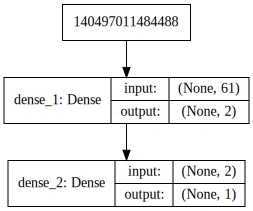

In [0]:
from keras.utils import plot_model
plot_model(model1,show_shapes=True, to_file='model1.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

#### Next, we fit the training data to the model (i.e. train the model). we pass the number of epochs as 10 and batch size as 50. We alos perform the model evaluation/validation in this step by passing in the validation data.

In [0]:
# Fit the model
history1 = model1.fit(X_train, Y_train, epochs=10,validation_data =(X_val, Y_val), batch_size=50)


Train on 1500 samples, validate on 250 samples
Epoch 1/10
1500/1500 [==============================] - 1s 696us/step - loss: 0.3218 - acc: 0.4893 - val_loss: 0.3808 - val_acc: 0.3720
Epoch 2/10
1500/1500 [==============================] - 0s 86us/step - loss: 0.3078 - acc: 0.5033 - val_loss: 0.3623 - val_acc: 0.4040
Epoch 3/10
1500/1500 [==============================] - 0s 86us/step - loss: 0.2948 - acc: 0.5100 - val_loss: 0.3441 - val_acc: 0.4280
Epoch 4/10
1500/1500 [==============================] - 0s 87us/step - loss: 0.2830 - acc: 0.5287 - val_loss: 0.3284 - val_acc: 0.4560
Epoch 5/10
1500/1500 [==============================] - 0s 85us/step - loss: 0.2722 - acc: 0.5440 - val_loss: 0.3130 - val_acc: 0.5000
Epoch 6/10
1500/1500 [==============================] - 0s 85us/step - loss: 0.2623 - acc: 0.5573 - val_loss: 0.3011 - val_acc: 0.5160
Epoch 7/10
1500/1500 [==============================] - 0s 89us/step - loss: 0.2534 - acc: 0.5820 - val_loss: 0.2893 - val_acc: 0.5360
Epoch 8

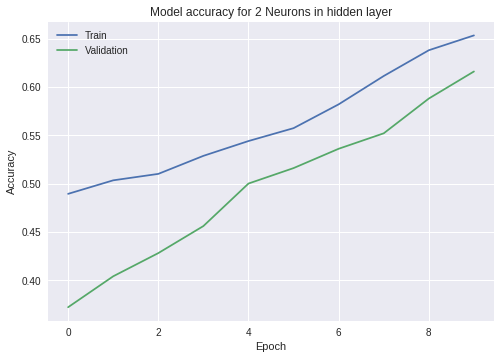

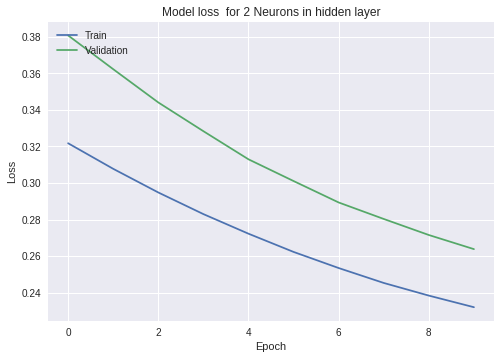

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy for 2 Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss  for 2 Neurons in hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## here, We plot the Training and validation accuracy and loss along with each epoch. We see that the accuracy increases and the loss decreases with time. we do this for all the 5 models.

In [0]:
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


In [0]:
# 4 neurons in hidden layer

# create model
model2 = Sequential()
model2.add(Dense(4, input_dim=len(X_train.columns), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))



In [0]:
# Compile model
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

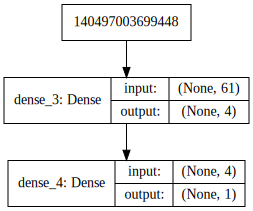

In [0]:
from keras.utils import plot_model
plot_model(model2,show_shapes=True, to_file='model2.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# Fit the model
history2 = model2.fit(X_train, Y_train, epochs=10,validation_data =(X_val, Y_val), batch_size=50)

Train on 1500 samples, validate on 250 samples
Epoch 1/10
1500/1500 [==============================] - 0s 202us/step - loss: 0.2619 - acc: 0.5400 - val_loss: 0.2383 - val_acc: 0.6240
Epoch 2/10
1500/1500 [==============================] - 0s 88us/step - loss: 0.2482 - acc: 0.5687 - val_loss: 0.2256 - val_acc: 0.6640
Epoch 3/10
1500/1500 [==============================] - 0s 86us/step - loss: 0.2368 - acc: 0.6127 - val_loss: 0.2145 - val_acc: 0.6960
Epoch 4/10
1500/1500 [==============================] - 0s 85us/step - loss: 0.2267 - acc: 0.6333 - val_loss: 0.2050 - val_acc: 0.7160
Epoch 5/10
1500/1500 [==============================] - 0s 84us/step - loss: 0.2177 - acc: 0.6593 - val_loss: 0.1963 - val_acc: 0.7520
Epoch 6/10
1500/1500 [==============================] - 0s 88us/step - loss: 0.2093 - acc: 0.6820 - val_loss: 0.1887 - val_acc: 0.7560
Epoch 7/10
1500/1500 [==============================] - 0s 92us/step - loss: 0.2012 - acc: 0.7040 - val_loss: 0.1805 - val_acc: 0.7680
Epoch 8

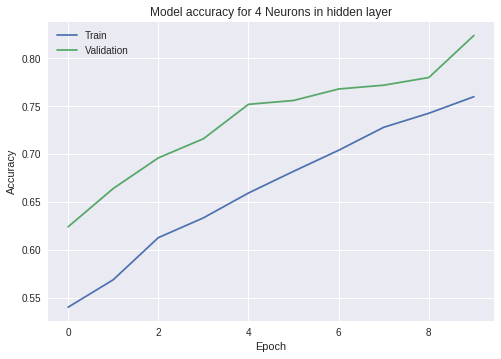

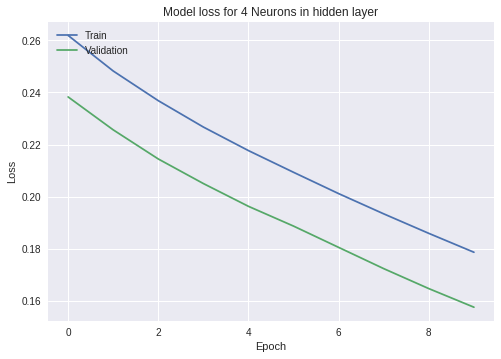

In [0]:

# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy for 4 Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss for 4 Neurons in hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


In [0]:
# 6 neurons in hidden layer

# create model
model3 = Sequential()
model3.add(Dense(6, input_dim=len(X_train.columns), activation='relu'))
model3.add(Dense(1, activation='sigmoid'))



In [0]:
# Compile model
model3.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

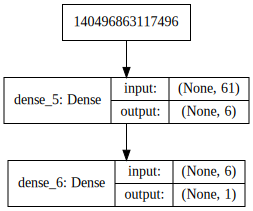

In [0]:
from keras.utils import plot_model
plot_model(model3,show_shapes=True, to_file='model3.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# Fit the model
history3 = model3.fit(X_train, Y_train, epochs=10,validation_data =(X_val, Y_val), batch_size=50)


Train on 1500 samples, validate on 250 samples
Epoch 1/10
1500/1500 [==============================] - 0s 227us/step - loss: 0.3008 - acc: 0.4973 - val_loss: 0.2923 - val_acc: 0.5160
Epoch 2/10
1500/1500 [==============================] - 0s 97us/step - loss: 0.2749 - acc: 0.5340 - val_loss: 0.2713 - val_acc: 0.5760
Epoch 3/10
1500/1500 [==============================] - 0s 96us/step - loss: 0.2512 - acc: 0.5853 - val_loss: 0.2521 - val_acc: 0.6120
Epoch 4/10
1500/1500 [==============================] - 0s 96us/step - loss: 0.2300 - acc: 0.6407 - val_loss: 0.2359 - val_acc: 0.6480
Epoch 5/10
1500/1500 [==============================] - 0s 97us/step - loss: 0.2116 - acc: 0.6847 - val_loss: 0.2199 - val_acc: 0.6760
Epoch 6/10
1500/1500 [==============================] - 0s 106us/step - loss: 0.1956 - acc: 0.7200 - val_loss: 0.2072 - val_acc: 0.6760
Epoch 7/10
1500/1500 [==============================] - 0s 100us/step - loss: 0.1821 - acc: 0.7367 - val_loss: 0.1953 - val_acc: 0.7120
Epoch

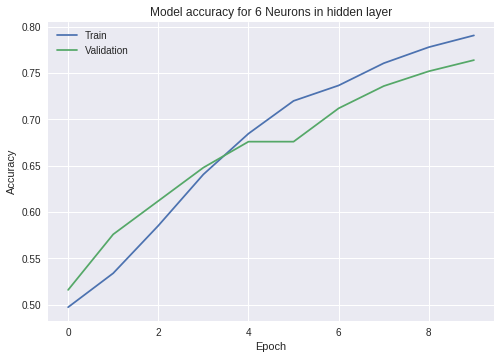

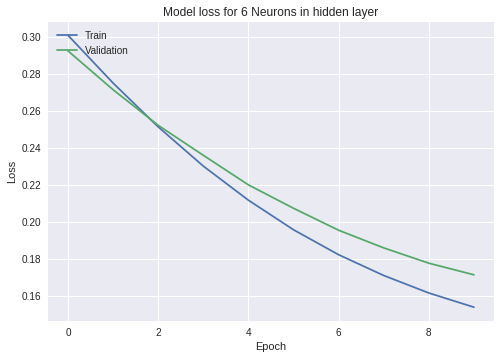

In [0]:

# Plot training & validation accuracy values
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy for 6 Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss for 6 Neurons in hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


In [0]:
# 8 neurons in hidden layer

# create model
model4 = Sequential()
model4.add(Dense(8, input_dim=len(X_train.columns), activation='relu'))
model4.add(Dense(1, activation='sigmoid'))



In [0]:
# Compile model
model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

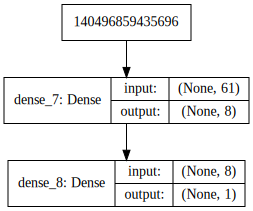

In [0]:
from keras.utils import plot_model
plot_model(model4,show_shapes=True, to_file='model4.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# Fit the model
history4 = model4.fit(X_train, Y_train, epochs=10,validation_data =(X_val, Y_val), batch_size=50)


Train on 1500 samples, validate on 250 samples
Epoch 1/10
1500/1500 [==============================] - 0s 243us/step - loss: 0.2802 - acc: 0.4993 - val_loss: 0.2621 - val_acc: 0.5600
Epoch 2/10
1500/1500 [==============================] - 0s 95us/step - loss: 0.2548 - acc: 0.5520 - val_loss: 0.2459 - val_acc: 0.6000
Epoch 3/10
1500/1500 [==============================] - 0s 98us/step - loss: 0.2339 - acc: 0.6093 - val_loss: 0.2295 - val_acc: 0.6440
Epoch 4/10
1500/1500 [==============================] - 0s 97us/step - loss: 0.2158 - acc: 0.6613 - val_loss: 0.2157 - val_acc: 0.6680
Epoch 5/10
1500/1500 [==============================] - 0s 101us/step - loss: 0.2003 - acc: 0.6987 - val_loss: 0.2026 - val_acc: 0.6840
Epoch 6/10
1500/1500 [==============================] - 0s 97us/step - loss: 0.1868 - acc: 0.7273 - val_loss: 0.1922 - val_acc: 0.7200
Epoch 7/10
1500/1500 [==============================] - 0s 104us/step - loss: 0.1747 - acc: 0.7520 - val_loss: 0.1809 - val_acc: 0.7440
Epoch

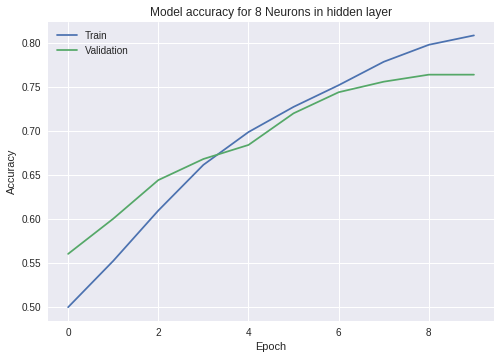

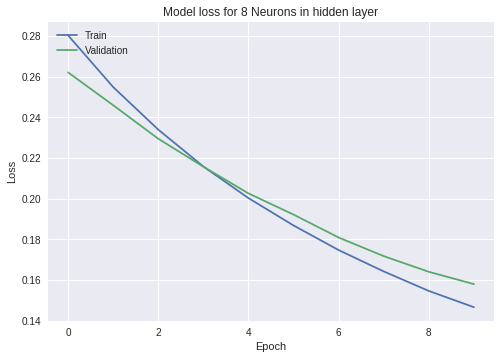

In [0]:

# Plot training & validation accuracy values
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('Model accuracy for 8 Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss for 8 Neurons in hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


In [0]:
# 10 neurons in hidden layer

# create model
model5 = Sequential()
model5.add(Dense(10, input_dim=len(X_train.columns), activation='relu'))
model5.add(Dense(1, activation='sigmoid'))



In [0]:
# Compile model
model5.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

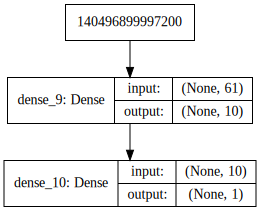

In [0]:
from keras.utils import plot_model
plot_model(model5,show_shapes=True, to_file='model5.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model5, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# Fit the model
history5 = model5.fit(X_train, Y_train, epochs=10,validation_data =(X_val, Y_val), batch_size=50)


Train on 1500 samples, validate on 250 samples
Epoch 1/10
1500/1500 [==============================] - 0s 258us/step - loss: 0.2570 - acc: 0.5727 - val_loss: 0.2111 - val_acc: 0.6560
Epoch 2/10
1500/1500 [==============================] - 0s 101us/step - loss: 0.2318 - acc: 0.6247 - val_loss: 0.2011 - val_acc: 0.6880
Epoch 3/10
1500/1500 [==============================] - 0s 104us/step - loss: 0.2129 - acc: 0.6647 - val_loss: 0.1915 - val_acc: 0.7160
Epoch 4/10
1500/1500 [==============================] - 0s 98us/step - loss: 0.1975 - acc: 0.7000 - val_loss: 0.1828 - val_acc: 0.7520
Epoch 5/10
1500/1500 [==============================] - 0s 101us/step - loss: 0.1845 - acc: 0.7353 - val_loss: 0.1728 - val_acc: 0.7640
Epoch 6/10
1500/1500 [==============================] - 0s 106us/step - loss: 0.1729 - acc: 0.7687 - val_loss: 0.1658 - val_acc: 0.7840
Epoch 7/10
1500/1500 [==============================] - 0s 101us/step - loss: 0.1628 - acc: 0.7867 - val_loss: 0.1579 - val_acc: 0.7840
Ep

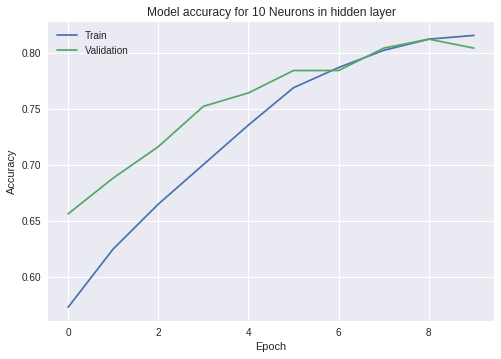

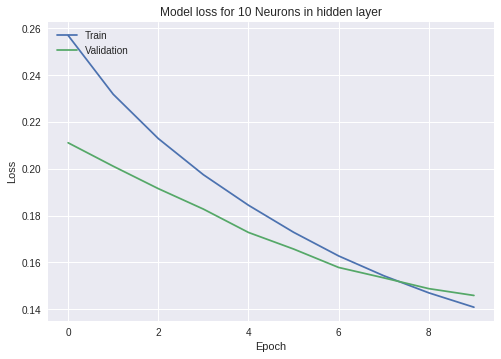

In [0]:

# Plot training & validation accuracy values
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('Model accuracy for 10 Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss for 10 Neurons in hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### (c) (3 points) Plot a figure, where the horizontal x-axis is the number of hidden neurons, and the vertical y-axis is the accuracy. Please plot both training and validation accuracy in your figure. (Note that the exact accuracy could be slightly different according to your working environments, however you can analyze the trend.)

In [0]:
val_accuracy_history = [history1.history['val_acc'][-1], history2.history['val_acc'][-1], history3.history['val_acc'][-1], history4.history['val_acc'][-1], history5.history['val_acc'][-1]]
train_accuracy_history = [history1.history['acc'][-1], history2.history['acc'][-1], history3.history['acc'][-1], history4.history['acc'][-1], history5.history['acc'][-1]]
no_of_neurons = [2,4,6,8,10]


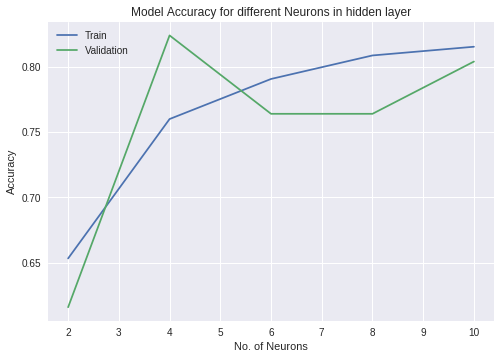

In [0]:
plt.plot(no_of_neurons,train_accuracy_history)
plt.plot(no_of_neurons,val_accuracy_history)

plt.title('Model Accuracy for different Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('No. of Neurons')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### (d) (3 points) Provide a simple analysis about your results and choose the optimal number of hidden neuron from the analysis.

### From the above plot, we see that the model with 4 neurons performs the best with the given parameters. We also see that we see a peak at 4, then the accuracy goes down. 

### However, as the no. of neurons reaches 10, our model reaches almost the same accuracy as the one with 4 neurons.

### we think that if we increase the number of epochs and/or vary the batch size or other parameters, We might end up with a better accuracy for the model with 10 neurons.

## We Chose the model with 4 neurons as the best model.

### (e) (2 points) Report the test accuracy using the given test dataset (X test, Y test) on the neural network with the optimal number of hidden neurons.

In [0]:
# Testing model with 4 neurons in the hidden layer.
eval_results = model2.evaluate(x=X_test, y=Y_test, batch_size = 50)
print("Mean Square Error (Loss Function) - {:.4f}".format(eval_results[0]))
print("Accuracy - {:.4f}".format(eval_results[1]))

250/250 [==============================] - 0s 50us/step
Mean Square Error (Loss Function) - 0.2030
Accuracy - 0.7080


### We see that the accuracy with the best model is 70.8% on the test dataset.

In [0]:
eval_results_10_neurons = model5.evaluate(x=X_test, y=Y_test, batch_size = 50)
print("Mean Square Error (Loss Function) - {:.4f}".format(eval_results_10_neurons[0]))
print("Accuracy - {:.4f}".format(eval_results_10_neurons[1]))

250/250 [==============================] - 0s 65us/step
Mean Square Error (Loss Function) - 0.1457
Accuracy - 0.8080


### For the model with 10 hidden neurons, The accuracy is 80.8%